## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [24]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [105]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Read colors data
colors = pd.read_csv('colors.csv')
sets = pd.read_csv('sets.csv')
# Print the first few rows
display(colors.head(10))
display(sets.head(10))

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
5,4,Red,C91A09,f
6,5,Dark Pink,C870A0,f
7,6,Brown,583927,f
8,7,Light Gray,9BA19D,f
9,8,Dark Gray,6D6E5C,f


,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,1978,186,15
8,00-2,Weetabix Promotional House 1,1976,413,147
9,00-3,Weetabix Promotional House 2,1976,413,149


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [106]:
# How many distinct colors are available?
num_colors = colors.shape[0]

n_colors = colors['name'].nunique()
print('the number of distinct color is {}'.format(n_colors))

the number of distinct color is 135


In [107]:
# string manipulation.
colors.head()
colors['name'] = colors['name'].apply(lambda x : x.lower())

In [108]:
# removing space between words in name column due to easier manipulation. 
colors['name'] = [i.replace(' ' , '_')  for i in colors['name']]
colors.head()

,id,name,rgb,is_trans
0,-1,unknown,0033B2,f
1,0,black,05131D,f
2,1,blue,0055BF,f
3,2,green,237841,f
4,3,dark_turquoise,008F9B,f


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134]),
 <a list of 135 Text major ticklabel objects>)

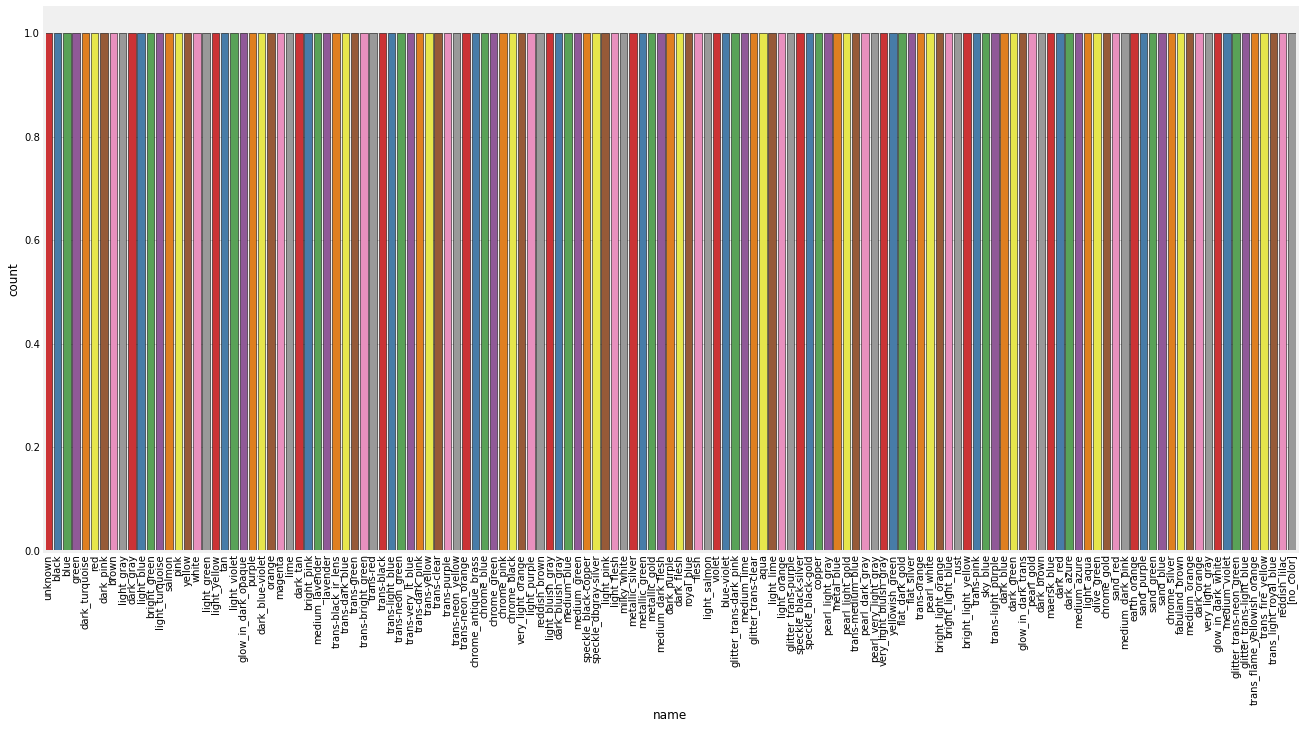

In [109]:
plt.figure(figsize=(20,10))
sns.countplot(colors['name'] , edgecolor = 'k' , palette='Set1')
plt.xticks(rotation = 90)

In [120]:
# Just for sample.
# Don't do this at home :)). use list comprehensions and if statement.
colors['name'] = colors['name'].replace(['light_green' , 'trans-neon_green' , 'trans-green' , 'dark_green' , 'olive_green' , 'chrome_green' ,'medium_green'] , 'green')
colors['name'] = colors['name'].replace(['light_gray' , 'light_bluish_gray' , 'pearl_very_light_gray' , 'very_light_gray' , 'pearl_light_gray' , 'very_light_bluish_gray'] , 'grey')
colors['name'] = colors['name'].replace(['light_blue' , 'trans-dark_blue' , 'trans-light_blue' , 'trans-very_lt_blue' , 'royal_blue' , 'trans-medium_blue' , 'bright_light_blue' , 'dark_blue' , 'sand_blue' , 'glitter_trans-light_blue' , 'trans_light_royal_blue'] , 'blue')
colors['name'].value_counts()



blue                  12
green                  8
grey                   6
dark_blue-violet       1
trans-orange           1
                      ..
dark_red               1
trans-dark_pink        1
metal_blue             1
chrome_blue            1
trans-light_purple     1
Name: name, Length: 112, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112]),
 <a list of 113 Text major ticklabel objects>)

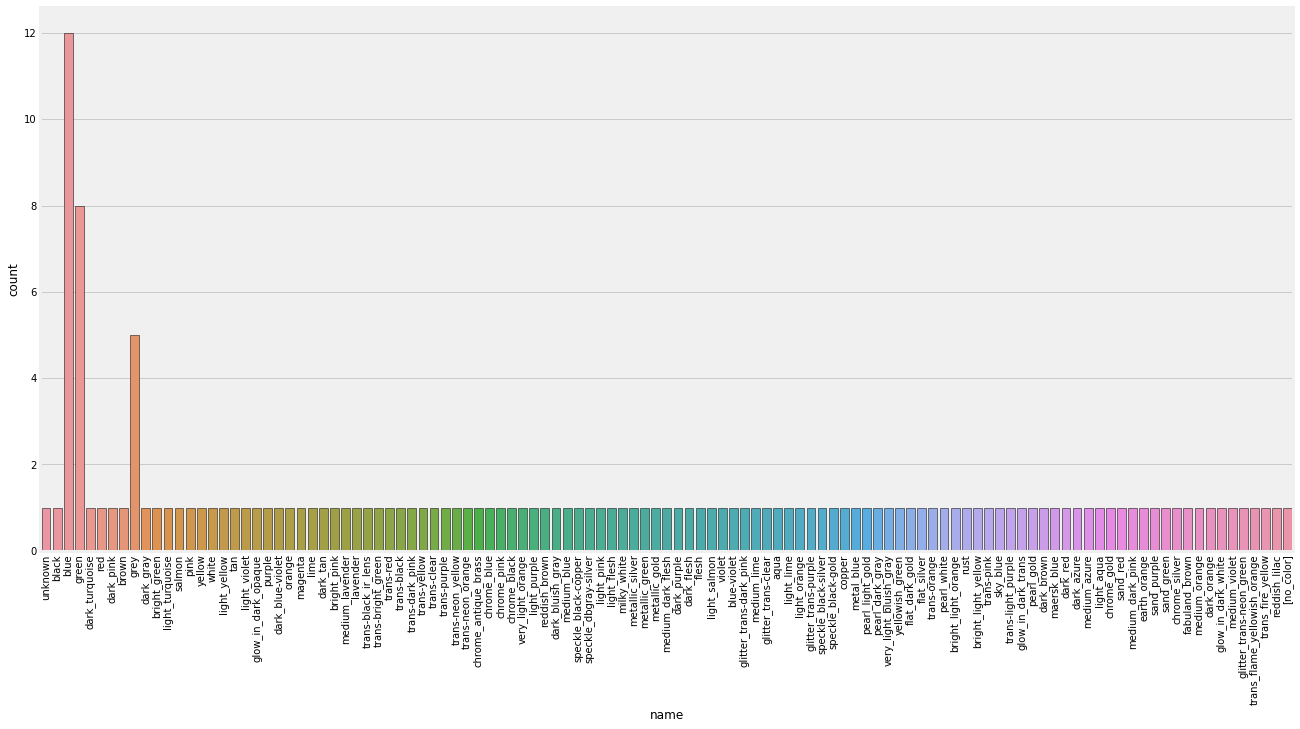

In [118]:
plt.figure(figsize=(20,10))
sns.countplot(colors['name'] , edgecolor = 'k')
plt.xticks(rotation = 90)

In [111]:
colors['name'].unique()

array(['unknown', 'black', 'blue', 'green', 'dark_turquoise', 'red',
       'dark_pink', 'brown', 'light_gray', 'dark_gray', 'light_blue',
       'bright_green', 'light_turquoise', 'salmon', 'pink', 'yellow',
       'white', 'light_yellow', 'tan', 'light_violet',
       'glow_in_dark_opaque', 'purple', 'dark_blue-violet', 'orange',
       'magenta', 'lime', 'dark_tan', 'bright_pink', 'medium_lavender',
       'lavender', 'trans-black_ir_lens', 'trans-dark_blue',
       'trans-bright_green', 'trans-red', 'trans-black',
       'trans-light_blue', 'trans-very_lt_blue', 'trans-dark_pink',
       'trans-yellow', 'trans-clear', 'trans-purple', 'trans-neon_yellow',
       'trans-neon_orange', 'chrome_antique_brass', 'chrome_blue',
       'chrome_green', 'chrome_pink', 'chrome_black', 'very_light_orange',
       'light_purple', 'reddish_brown', 'light_bluish_gray',
       'dark_bluish_gray', 'medium_blue', 'medium_green',
       'speckle_black-copper', 'speckle_dbgray-silver', 'light_pink',
  

In [92]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,green,237841,f
4,3,Dark Turquoise,008F9B,f


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [17]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby(colors['is_trans']).count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


Text(0.5, 1.0, 'Distribution of colors based on transparency')

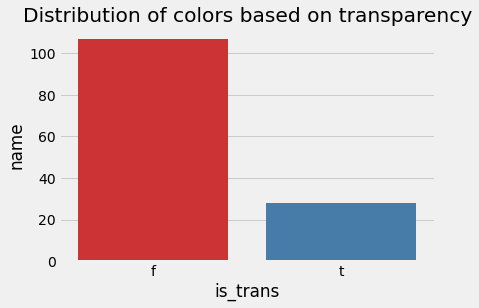

In [24]:
plt.style.use('fivethirtyeight')
sns.set_palette('Set1')
sns.barplot(x = colors_summary.index  , y = 'name' , data = colors_summary)
plt.title('Distribution of colors based on transparency')

## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

  set_num                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle  1970       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


,year,num_parts
0,1950,10.142857
1,1953,16.500000
2,1954,12.357143
3,1955,36.857143
4,1956,18.500000


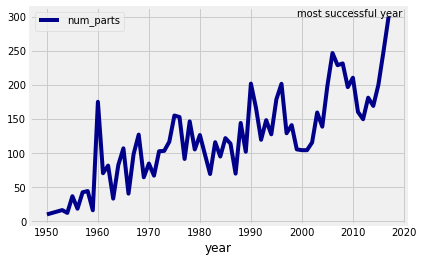

In [123]:
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('sets.csv')

print(sets.head())

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year', 'num_parts']].groupby('year', as_index=False).mean()
# Plot trends in average number of parts by year
parts_by_year.plot(x = 'year', y = 'num_parts' , color = 'darkblue')
plt.annotate(xy=(2009,300) , xytext = (1999,300) ,s = 'most successful year', arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90" , facecolor ='green'))
parts_by_year.head()


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [68]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index=False).count()
themes_by_year.head()

,year,theme_id
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

In [36]:
# good luck !